In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq, readseq, match_hist
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from corrLib import density_fluctuation
from scipy import signal
from scipy.interpolate import griddata
import matplotlib

In [2]:
# figure initializing presets
presets = {}
presets['1-column-2-panel'] = (1.25, 1.57, 157)
presets['1-column-1-panel'] = (1.25, 3.2, 157)
h, w, dpi = presets['1-column-2-panel']

In [3]:
# matplotlib configs

# FONT
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['text.usetex'] = True 

# FIGURE
matplotlib.rcParams['figure.figsize'] = w, h
matplotlib.rcParams['figure.dpi'] = dpi

# AXES
matplotlib.rcParams['axes.labelpad'] = 1.0
matplotlib.rcParams['axes.labelsize'] = 'small'
matplotlib.rcParams['axes.linewidth'] = 0.5

# TICKS
matplotlib.rcParams['xtick.labelsize'] = 'small'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.major.size'] = 2.5
matplotlib.rcParams['xtick.minor.size'] = 1.6

matplotlib.rcParams['ytick.labelsize'] = 'small'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.major.size'] = 2.5
matplotlib.rcParams['ytick.minor.size'] = 1.6

# LEGEND
matplotlib.rcParams['legend.labelspacing'] = 0.2
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['legend.handletextpad'] = 0.2
matplotlib.rcParams['legend.columnspacing'] = 0.5
matplotlib.rcParams['legend.frameon'] = False

In [8]:
folder = r'E:\moreData\03032020'
sfL = next(os.walk(folder))[1]
nameL = []
intensityL = []
for name in sfL:
    if name.find('_') >= 0 and name.find('_') < 3:
        img = io.imread(os.path.join(folder, name, '16-bit', '0000.tif'))
        nameL.append(name)
        intensityL.append(img.mean())
data = pd.DataFrame().assign(name=nameL, intensity=intensityL)

In [9]:
# construct dictionary data
dict_data = {}
for num, i in data.iterrows():
    f, l = i['name'].split('_')
    if f in dict_data.keys():
        dict_data[f].append(i.intensity)
    else:
        dict_data[f] = []
        dict_data[f].append(i.intensity)

In [10]:
# construct dataframe
df = pd.DataFrame(data=dict_data)
cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]
mean = df.mean()
std = df.std()

c = []
for s in cols:
    c.append(int(s))

Text(0.5, 0, '$I$ ($a.u.$)')

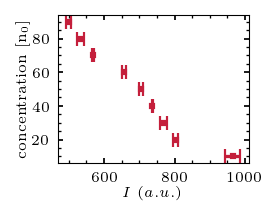

In [17]:
plt.errorbar(mean, c, xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=3, markersize=2)
plt.ylabel('$n$ [n$_0$]')
plt.xlabel('$I$ ($a.u.$)')

In [7]:
def log_fit(x, I0, k):
    return k * np.log10(I0/x)
po, pv = curve_fit(log_fit, mean, c, p0=[2048, 400])

Text(700, 80, '$c=308\\times\\log_{10}\\frac{993}{I}$')

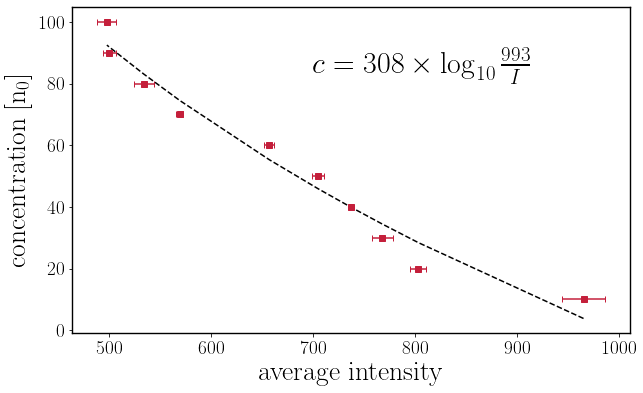

In [8]:
plt.errorbar(mean, c, xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=3)
plt.plot(mean, log_fit(np.array(mean), *po), ls='--', color='black')
plt.ylabel('concentration [n$_0$]')
plt.xlabel('average intensity')
plt.text(700, 80, '$c=308\\times\log_{10}\\frac{993}{I}$', fontdict={'size': 30})

In [9]:
def linear_fit(x, a, b):
    return a - b * x
po, pv = curve_fit(linear_fit, mean, c, p0=[1000, 1])

NameError: name 'mean' is not defined

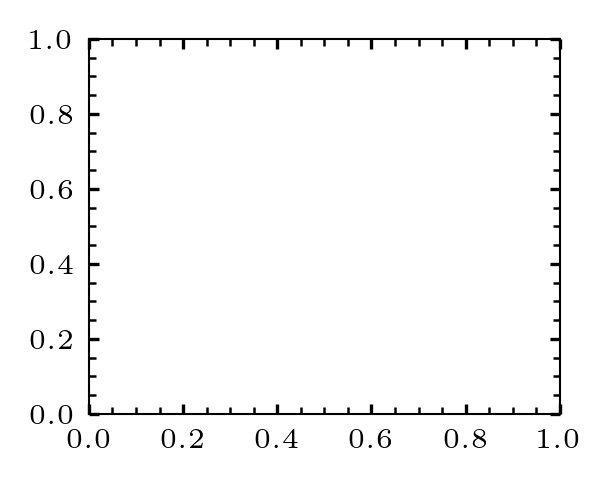

In [5]:
fig = plt.figure(dpi=300)
ax = fig.add_axes([0,0,1,1])
mean = mean.sort_values()
ax.errorbar(mean, np.array(mean.index).astype('int'), xerr=std, ls='', c=wowcolor(0), marker='s',  capsize=1, markersize=2, elinewidth=0.5)
ax.plot(mean, linear_fit(np.array(mean), *po), ls='--', color='black', lw=0.5)
ax.set_ylabel('$n$ [n$_0$]')
ax.set_xlabel('$I$ ($a.u.$)')
# plt.text(700, 80, '$c=186-0.19I$', fontdict={'size': 30})

In [11]:
mean.drop('10')

20    802.839403
30    767.767674
40    737.077040
50    704.516844
60    656.868279
70    569.169544
80    533.790867
90    499.875581
dtype: float64

In [12]:
mean[:-1]

20    802.839403
30    767.767674
40    737.077040
50    704.516844
60    656.868279
70    569.169544
80    533.790867
90    499.875581
dtype: float64

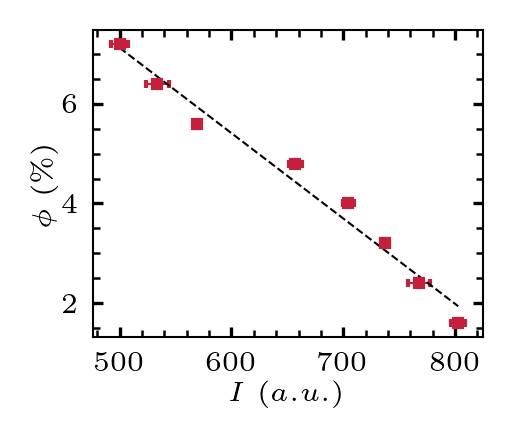

In [32]:
fig, ax = plt.subplots(figsize=(1.75, 1.50), dpi=300)
mean1 = mean.sort_values()[:-1]
ax.errorbar(mean1, np.array(mean1.index).astype('int') * 0.08, xerr=std[:-1], ls='', c=wowcolor(0), marker='s',  capsize=1, markersize=2, elinewidth=0.5)
p = np.polyfit(mean1, np.array(mean1.index).astype('int') * 0.08, deg=1)
ax.plot(mean1, p[0]*mean1+p[1], ls='--', color='black', lw=0.5)
ax.set_ylabel('$\phi$ (\%)')
ax.set_xlabel('$I$ ($a.u.$)')
plt.tight_layout()
fig.savefig(r'E:\Github\GNF-paper\V_1\Figures\fig-1\v3a.pdf')